In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\market\sales\sales.csv')
df.head()

,Branch,Category,Sub_Category,Product,Price,Cost_Price,Payment_Type,Order_Date
0,Austin-Texas,Arts & Crafts,Crafting,"Command Large Picture Hanging Strips, White, H...",13.27,11.539999,Cash,2021-08-31
1,Austin-Texas,Arts & Crafts,Crafting,"Scissors, iBayam 8"" Multipurpose Scissors Bulk...",6.79,6.187303,Cash,2021-06-24
2,Austin-Texas,Arts & Crafts,Crafting,Luna Bean Keepsake Hands Casting Kit | DIY Pla...,34.99,32.931599,Cash,2021-02-24
3,Austin-Texas,Arts & Crafts,Crafting,Amazon Basics Clear Thermal Laminating Plastic...,16.16,14.634799,ATM card,2021-01-03
4,San Francisco-Carlifornia,Arts & Crafts,Crafting,"Scotch Thermal Laminating Pouches, 100-Pack, 8...",15.18,13.025127,Cash,2021-03-01


# Data Wrangle

## Data Assessing & Cleaning
### Quality Problems:
- Data Type of Order Date Column must be Date not Object

In [4]:
#check for missing values
df.isna().sum()

Branch          0
Category        0
Sub_Category    0
Product         0
Price           0
Cost_Price      0
Payment_Type    0
Order_Date      0
dtype: int64

In [5]:
# check for duplicates
df.duplicated().sum()

0

In [19]:
# there is no inconsistent values
df['Branch'].unique(),df['Category'].unique(),df['Sub_Category'].unique(),df['Payment_Type'].unique()

(array(['Austin-Texas', 'San Francisco-Carlifornia', 'Houston-Texas',
        'Buffalo-New York', 'Sparks-Nevada'], dtype=object),
 array(['Arts & Crafts', 'Automotive', 'Baby', 'Beauty & Personal Care',
        'Computers', 'Electronics', "Women's Fashion", "Men's Fashion",
        "Girls' Fashion", "Boys' Fashion", 'Health & Household',
        'Home & Kitchen', 'Industrial & Scientific', 'Luggage'],
       dtype=object),
 array(['Crafting', 'Fabric', 'Fabric Decorating',
        'Gift Wrapping Supplies', 'Knitting & Crochet',
        'Model & Hobby Building', 'Needlework',
        'Organization, Storage & Transport',
        'Painting, Drawing & Art Supplies', 'Party Decorations & Supplies',
        'Printmaking', 'Scrapbooking & Stamping', 'Sewing',
        'Car Electronics & Accessories', 'Exterior Accessories',
        'Interior Accessories', 'Lights & Lighting Accessories',
        'Motorcycle & Powersports', 'Oils & Fluids',
        'Paint & Paint Supplies', 'Performance Parts 

In [13]:
#check data types
df.dtypes

Branch           object
Category         object
Sub_Category     object
Product          object
Price           float64
Cost_Price      float64
Payment_Type     object
Order_Date       object
dtype: object

In [15]:
# Order Date datatype must be date not Object
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [28]:
# number of unique items of Obej Columns
df.iloc[:,np.r_[:4,-2]].nunique()
# Sub_Category & Product are high cardinality columns

Branch             5
Category          14
Sub_Category     123
Product         1804
Payment_Type       5
dtype: int64

In [43]:
df.describe(include='all').T.fillna(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_28676\1267021545.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T.fillna(0)


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Branch,234925.0,5,Austin-Texas,96178,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Category,234925.0,14,Electronics,39267,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sub_Category,234925.0,123,Clothing,9840,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Product,234925.0,1804,Amazon Basics 48 Pack AA High-Performance Alka...,2210,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Price,234925.0,0,0,0,0,0,30.568877,40.703481,1.690000,11.990000,19.880000,33.990000,789.000000
Cost_Price,234925.0,0,0,0,0,0,27.151869,34.410779,1.440446,10.659099,17.478889,30.186373,707.458336
Payment_Type,234925.0,5,Cash,164311,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Order_Date,234925.0,365,2021-11-23 00:00:00,722,2021-01-01 00:00:00,2021-12-31 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# EDA (Exploratory & Explanatory Data Analysis)

# Feature Engineering

In [45]:
df['Profit'] = df['Price'] - df['Cost_Price']

In [46]:
df = df.set_index('Order_Date')
df = df.sort_index()

## Remove Outliers

In [55]:
def calculate_lower_upper_bounds(df, multiplier=1.5):
    """
    Calculate the lower and upper bounds based on the Interquartile Range (IQR) for each numerical column in a DataFrame.

    Parameters:
    - df: A Pandas DataFrame.
    - multiplier: A multiplier to adjust the range. By default, it's set to 1.5.

    Returns:
    - bounds_dict: A dictionary where keys are column names, and values are tuples (lower_bound, upper_bound) for each column.
    """
    bounds_dict = {}

    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column contains numerical data
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate the IQR for the column
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            # Calculate lower and upper bounds
            lower_bound = q1 - multiplier * iqr
            upper_bound = q3 + multiplier * iqr

            # Store bounds in the dictionary
            bounds_dict[column] = (lower_bound, upper_bound)

    return bounds_dict

In [56]:
calculate_lower_upper_bounds(df)

{'Price': (-21.009999999999998, 66.99000000000001),
 'Cost_Price': (-18.631812341919115, 59.47728346108998),
 'Profit': (-2.2348005118659966, 6.683694950652894)}

In [106]:
df1 = df.query("Price <= 66.99000000000001")

In [107]:
df1.describe()

,Price,Cost_Price,Profit
count,216013.000000,216013.000000,216013.000000
mean,21.556990,19.401047,2.155943
std,13.138181,11.845195,1.505223
min,1.690000,1.440446,0.090799
25%,11.250000,10.226322,1.057034
50%,17.990000,16.104160,1.731051
75%,29.240000,26.103601,2.846739
max,66.990000,63.631980,9.938559


In [108]:
Overall_ABC = df1[['Category','Profit']].groupby("Category")['Profit'].sum().sort_values(ascending=False).reset_index()

In [109]:
Overall_ABC['sum']=Overall_ABC['Profit']/Overall_ABC['Profit'].sum()

In [110]:
Overall_ABC['CUMSUM']=Overall_ABC['sum'].cumsum()

In [111]:
def ABC_segmentation(x):
    if x <= .80 :
        return 'A'
    elif x > .80 and x <= .90:
        return 'B'
    else :
        return 'C'

In [112]:
Overall_ABC['segemant']=Overall_ABC['CUMSUM'].apply(ABC_segmentation)

In [113]:
Overall_ABC['Category'].values

array(['Electronics', 'Home & Kitchen', 'Baby', 'Beauty & Personal Care',
       'Health & Household', 'Computers', 'Automotive',
       'Industrial & Scientific', "Men's Fashion", "Women's Fashion",
       'Arts & Crafts', "Girls' Fashion", "Boys' Fashion", 'Luggage'],
      dtype=object)

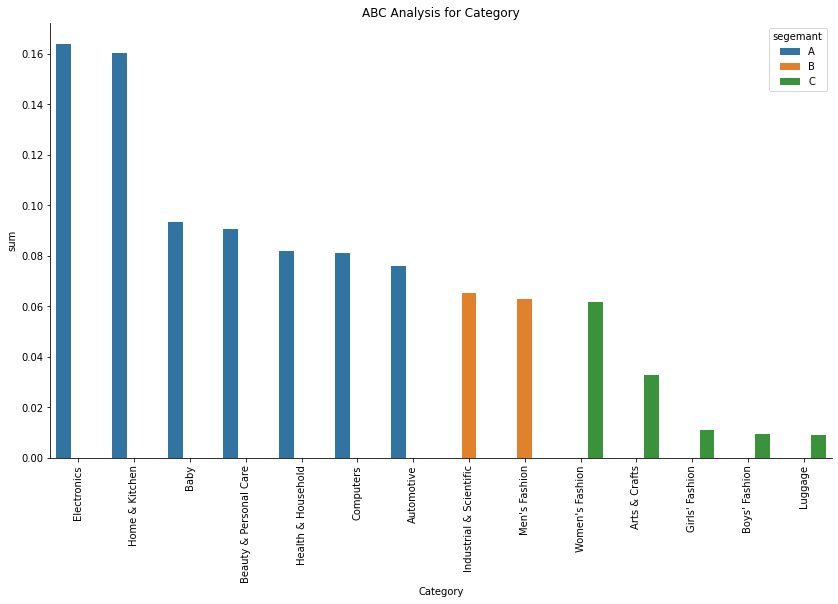

In [114]:
plt.subplots(figsize=(14,8))
bars = sns.barplot(data = Overall_ABC ,x = 'Category' ,y = 'sum' , hue = 'segemant' ,estimator=np.sum )
plt.title("ABC Analysis for Category")
sns.despine()
plt.xticks(rotation = 90)
plt.show()

- Electronics ,Home & Kitchen ,Baby ,Beatuy ,Healty & Household ,Automotive and Computers are the most required and sold products
- Boys'Fashion ,Girls' Fashion and Lungguage are the least required and sold product  

In [115]:
df1

,Branch,Category,Sub_Category,Product,Price,Cost_Price,Payment_Type,Profit
Order_Date,,,,,,,,
2021-01-01,San Francisco-Carlifornia,Electronics,Cell Phones & Accessories,Ailun Glass Screen Protector Compatible for iP...,7.89,7.126289,Cash,0.763711
2021-01-01,Austin-Texas,Beauty & Personal Care,Tools & Accessories,Schick Hydro Silk Touch-Up Multipurpose Exfoli...,4.99,4.353376,ATM card,0.636624
2021-01-01,Buffalo-New York,Automotive,Interior Accessories,EcoNour Car Windshield Sun Shade with Storage ...,13.59,12.822730,Cash,0.767270
2021-01-01,San Francisco-Carlifornia,Electronics,"Household Batteries, Chargers & Accessories","Energizer AAA Batteries, Max Triple A Battery ...",19.18,16.762336,Cash,2.417664
2021-01-01,Buffalo-New York,Luggage,Umbrellas,totes Women's Clear Bubble Umbrella,21.75,18.735376,ATM card,3.014624
...,...,...,...,...,...,...,...,...
2021-12-31,Austin-Texas,Automotive,Interior Accessories,Drop Stop - The Original Patented Car Seat Gap...,24.99,22.951228,Cash,2.038772
2021-12-31,Austin-Texas,Baby,Nursery,Playtex Diaper Genie Complete Pail with Built-...,47.26,41.829903,ATM card,5.430097
2021-12-31,Austin-Texas,Electronics,"Household Batteries, Chargers & Accessories",Amazon Basics 12 Pack D Cell All-Purpose Alkal...,15.49,14.521714,Cash,0.968286


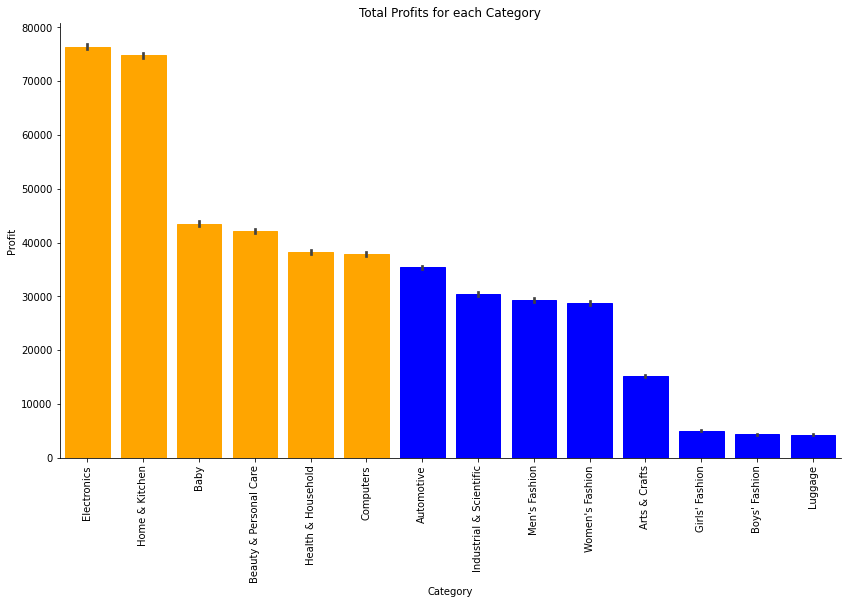

In [116]:
plt.subplots(figsize=(14,8))
bars = sns.barplot(data = df1 ,x = 'Category' ,y = 'Profit' ,estimator=np.sum ,order = ['Electronics', 'Home & Kitchen', 'Baby', 'Beauty & Personal Care',
       'Health & Household', 'Computers', 'Automotive',
       'Industrial & Scientific', "Men's Fashion", "Women's Fashion",
       'Arts & Crafts', "Girls' Fashion", "Boys' Fashion", 'Luggage'])
for _ in bars.containers[0].patches:
    _.set_color('blue')
for _ in bars.containers[0].patches[:6]:
    _.set_color('orange')
plt.title("Total Profits for each Category")

sns.despine()
plt.xticks(rotation = 90)
plt.show()

- Electronics ,Home & Kitchen ,Baby ,Beatuy ,Healty & Household ,Automotive and Computers are the most Profitable Products
- Boys'Fashion ,Girls' Fashion and Lungguage are the least Profitable Products

In [117]:
df2 = df1.reset_index().copy()

In [118]:
df2['month']=df2['Order_Date'].dt.month

In [119]:
months_ABC = df2[['month','Category','Profit']].groupby(["month","Category"])['Profit'].sum().sort_values(ascending=False).reset_index()

In [120]:
months_ABC = months_ABC.sort_values(['month','Category'])

In [121]:
months_profits = months_ABC.groupby("month")['Profit'].sum()

In [122]:
months_ABC = months_ABC.set_index('month')

In [123]:
months_ABC['Profit']=months_ABC['Profit'].div(months_profits)

In [124]:
months_ABC1 = months_ABC.reset_index().copy()

In [125]:
months_ABC1 = months_ABC1.sort_values(by=['month','Profit'],ascending=[True ,False])

In [126]:
months_ABC1['cumsum']=months_ABC1.groupby("month")['Profit'].cumsum()

In [127]:
months_ABC1['segem']=(months_ABC1['cumsum'].apply(ABC_segmentation))

In [128]:
months_ABC1

,month,Category,Profit,cumsum,segem
6,1,Electronics,0.164033,0.164033,A
9,1,Home & Kitchen,0.163777,0.327810,A
2,1,Baby,0.092615,0.420425,A
3,1,Beauty & Personal Care,0.090890,0.511315,A
8,1,Health & Household,0.081001,0.592317,A
...,...,...,...,...,...
167,12,Women's Fashion,0.060894,0.940602,C
154,12,Arts & Crafts,0.032031,0.972633,C
161,12,Girls' Fashion,0.010496,0.983129,C
158,12,Boys' Fashion,0.008745,0.991874,C


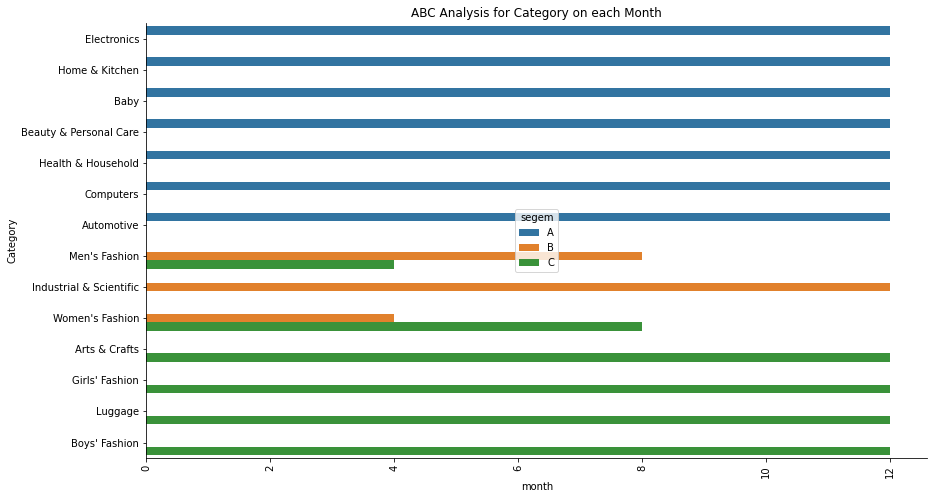

In [129]:
plt.subplots(figsize=(14,8))
bars = sns.barplot(data = months_ABC1 ,x = 'month' ,y = 'Category' , hue = 'segem' ,estimator=np.count_nonzero )
plt.title("ABC Analysis for Category on each Month")
sns.despine()
plt.xticks(rotation = 90)
plt.show()

- Electronics ,Home & Kitchen ,Baby ,Beatuy ,Healty & Household ,Automotive and Computers are the most required and sold products with the same important over all months
- Boys'Fashion ,Girls' Fashion ,Arts & Crafts and Lungguage are the least required and sold product with the same important over all months

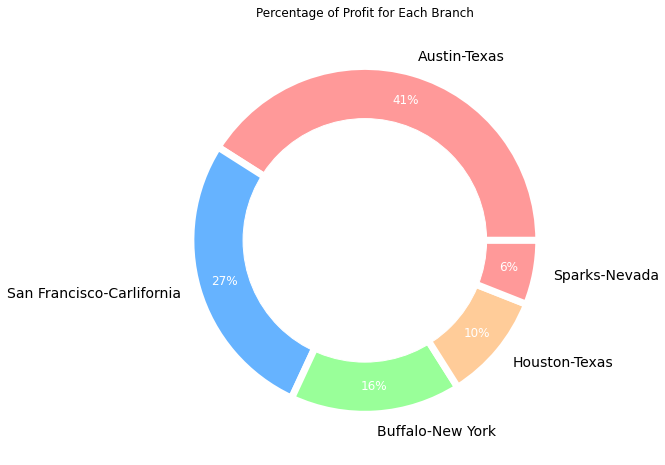

In [130]:
circle = plt.Circle((0,0),0.7,color='white')
fig, ax = plt.subplots(figsize=(8,8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
wedges, texts, autotexts =ax.pie(df1.groupby("Branch")['Profit'].sum().sort_values(ascending=False), labels=['Austin-Texas', 'San Francisco-Carlifornia', 'Buffalo-New York',
       'Houston-Texas', 'Sparks-Nevada'], colors=colors, wedgeprops={'linewidth': 7, 'edgecolor': 'white'},autopct='%.0f%%',pctdistance=0.84)
ax.add_artist(circle)
plt.setp(autotexts, size=12, color='white')
for label in texts:
    label.set_fontsize(14)
plt.title("Percentage of Profit for Each Branch")
plt.show()

- San Francisco-Carlifornia and Austin-Texas branchs got about 70% percentage of the total profit
- Sparks-Nevada and Houston-Texas didn't get much profit as another branchs ( less profitable Branchs)

In [131]:
brac = df2.groupby(["month","Branch"])['Profit'].sum().reset_index()
brac=brac.sort_values(by=['month','Branch'],ascending=[True ,True])

In [132]:
brac['perc'] = brac.set_index("month")['Profit'].div(brac.groupby("month")['Profit'].sum()).values

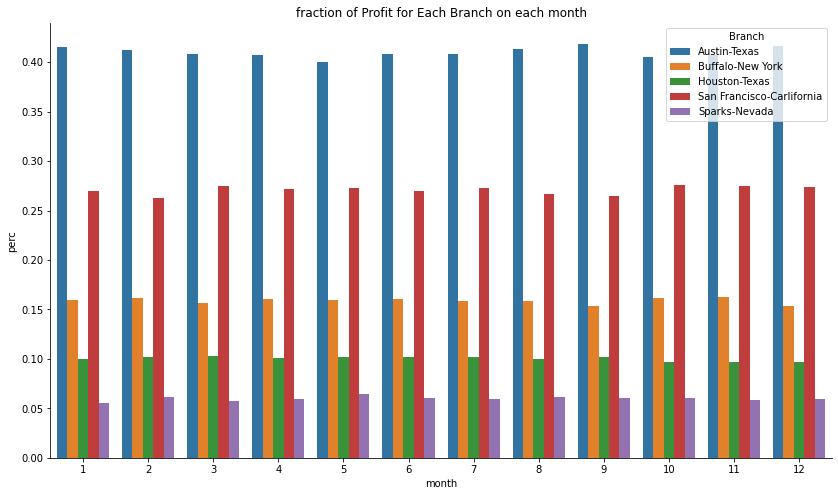

In [133]:
plt.subplots(figsize=(14,8))
sns.barplot(data=brac ,x='month',y='perc',hue='Branch',estimator=np.sum)
sns.despine()
plt.title("fraction of Profit for Each Branch on each month")
plt.show()

- this visualization give us a good thought about the branchs over the months
- all branchs gain the same profit fraction over all months ( Sparks-Nevada are the least profitable branch ) Weird right !!
-  Austin-Texas branch are the highest one with the same level over all month ,what reasons make this branch most profitable one !!

In [134]:
XYZ_table = df2.groupby(["Category","month"])['Profit'].sum().reset_index()

In [135]:
XYZ = XYZ_table.pivot_table(index = 'Category' ,columns ='month' ,values = 'Profit' ,aggfunc = 'sum')

In [136]:
XYZ = XYZ.div(XYZ.sum(axis=1),axis=0)

In [137]:
XYZ['XYZ']=XYZ.std(axis=1)/XYZ.mean(axis=1)

In [138]:
def xyz_se(x):
    if x <= 0.05:
        return 'X'
    elif x >0.05 and x <= 0.08:
        return 'Y'
    else :
        return 'Z'

In [139]:
XYZ['segm']=XYZ['XYZ'].apply(xyz_se)

In [140]:
XYZ['m']=XYZ.iloc[:,:-2].mean(axis=1)

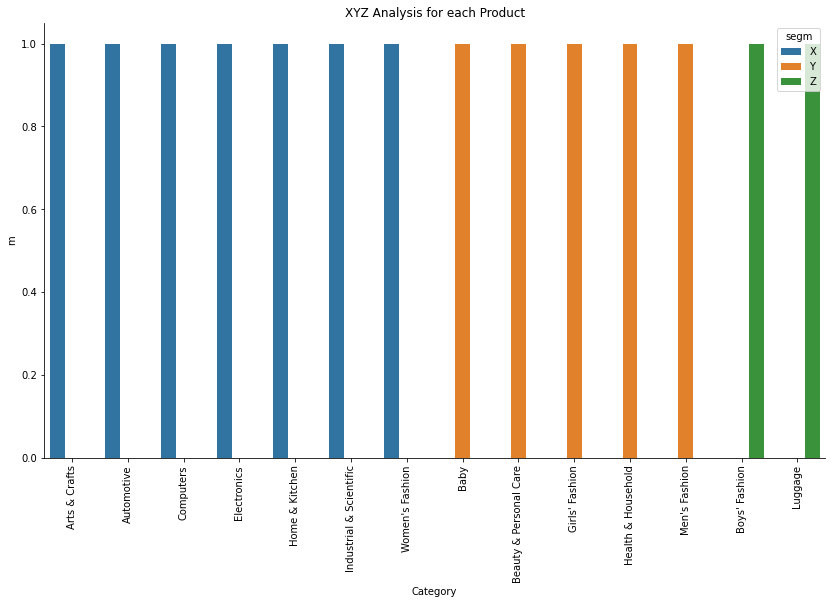

In [141]:
plt.subplots(figsize=(14,8))
sns.barplot(data=XYZ.reset_index().sort_values(by='segm') ,x='Category',y='m',hue='segm',estimator=np.count_nonzero)
sns.despine()
plt.xticks(rotation = 90)
plt.title("XYZ Analysis for each Product")
plt.show()

- Electronics ,Home & Kitchen ,Baby ,Beatuy ,Healty & Household ,Automotive and Computers ( The demand for these products is regular and stable )
- Boys'Fashion ,Lungguage ( not regular and stable)

In [142]:
XYZ_table1 = df2.groupby(["Branch","month"])['Profit'].sum().reset_index()
XYZ1 = XYZ_table1.pivot_table(index = 'Branch' ,columns ='month' ,values = 'Profit' ,aggfunc = 'sum')
XYZ1 = XYZ1.div(XYZ1.sum(axis=1),axis=0)
XYZ1['XYZ']=XYZ1.std(axis=1)/XYZ1.mean(axis=1)

In [143]:
XYZ1['sem']=XYZ1['XYZ'].apply(xyz_se)

In [144]:
XYZ1['m'] = XYZ1.iloc[:,:-2].mean(axis=1)

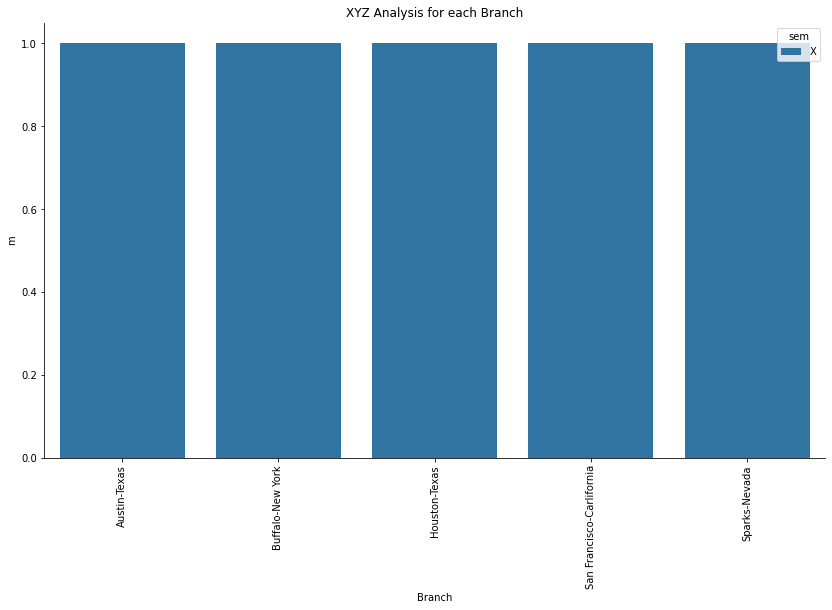

In [145]:
plt.subplots(figsize=(14,8))
sns.barplot(data=XYZ1.reset_index().sort_values(by='sem') ,x='Branch',y='m',hue='sem',estimator=np.count_nonzero)
sns.despine()
plt.xticks(rotation = 90)
plt.title("XYZ Analysis for each Branch")
plt.show()

- all branch have regular and stable profit so we can estimate profit of the next month or week and so on

In [972]:
df2

,Order_Date,Branch,Category,Sub_Category,Product,Price,Cost_Price,Payment_Type,Profit,month
0,2021-01-01,San Francisco-Carlifornia,Electronics,Cell Phones & Accessories,Ailun Glass Screen Protector Compatible for iP...,7.89,7.126289,Cash,0.763711,1
1,2021-01-01,Austin-Texas,Beauty & Personal Care,Tools & Accessories,Schick Hydro Silk Touch-Up Multipurpose Exfoli...,4.99,4.353376,ATM card,0.636624,1
2,2021-01-01,Buffalo-New York,Automotive,Interior Accessories,EcoNour Car Windshield Sun Shade with Storage ...,13.59,12.822730,Cash,0.767270,1
3,2021-01-01,San Francisco-Carlifornia,Electronics,"Household Batteries, Chargers & Accessories","Energizer AAA Batteries, Max Triple A Battery ...",19.18,16.762336,Cash,2.417664,1
4,2021-01-01,Buffalo-New York,Luggage,Umbrellas,totes Women's Clear Bubble Umbrella,21.75,18.735376,ATM card,3.014624,1
...,...,...,...,...,...,...,...,...,...,...
216008,2021-12-31,Austin-Texas,Automotive,Interior Accessories,Drop Stop - The Original Patented Car Seat Gap...,24.99,22.951228,Cash,2.038772,12
216009,2021-12-31,Austin-Texas,Baby,Nursery,Playtex Diaper Genie Complete Pail with Built-...,47.26,41.829903,ATM card,5.430097,12
216010,2021-12-31,Austin-Texas,Electronics,"Household Batteries, Chargers & Accessories",Amazon Basics 12 Pack D Cell All-Purpose Alkal...,15.49,14.521714,Cash,0.968286,12
216011,2021-12-31,Houston-Texas,Health & Household,"Vitamins, Minerals & Supplements",Turmeric Curcumin with BioPerine 1500mg - Natu...,18.79,17.204209,ATM card,1.585791,12


In [1009]:
Austin_Texas = df2.query("Branch == 'Austin-Texas'").pivot_table(index =["Branch","Category"]  ,columns=["month"] ,values=["Profit"] ,aggfunc='sum')

In [1010]:
Austin_Texas['xyz']=Austin_Texas.std(axis = 1) / Austin_Texas.mean(axis = 1)

In [1011]:
Austin_Texas.columns = [1,2,3,4,5,6,7,8,9,10,11,12,'xyz']

In [1012]:
Austin_Texas['xyz'].max()

0.17009600652758985

In [1013]:
San_Francisco_Carlifornia = df2.query("Branch == 'San Francisco-Carlifornia'").pivot_table(index =["Branch","Category"]  ,columns=["month"] ,values=["Profit"] ,aggfunc='sum')

In [1014]:
San_Francisco_Carlifornia['xyz']=San_Francisco_Carlifornia.std(axis = 1) / San_Francisco_Carlifornia.mean(axis = 1)

In [1015]:
San_Francisco_Carlifornia.columns = [1,2,3,4,5,6,7,8,9,10,11,12,'xyz']

In [1016]:
San_Francisco_Carlifornia['xyz'].max()

0.18476328682899923

In [1019]:
San_Francisco_Carlifornia.sort_values(by='xyz')

1            2  \
Branch                    Category                                            
San Francisco-Carlifornia Electronics              1683.538067  1546.869840   
                          Home & Kitchen           1812.266316  1570.347783   
                          Arts & Crafts             339.843385   346.738436   
                          Baby                      987.004757   898.273452   
                          Industrial & Scientific   714.950061   604.795734   
                          Automotive                778.544582   731.391794   
                          Beauty & Personal Care   1032.277824   808.934701   
                          Health & Household        876.592198   694.159550   
                          Men's Fashion             648.730797   522.904423   
                          Women's Fashion           632.834674   597.990368   
                          Computers                 760.589799   773.272104   
                          Girls' Fashion            128.141242   104.677702   
                          Boys' Fashion              78.465154    71.997474   
                          Luggage                   106.711237    86.066676   

                                                             3            4  \
Branch                    Category                                            
San Francisco-Carlifornia Electronics              1799.662104  1636.545696   
                          Home & Kitchen           1816.126948  1593.550761   
                          Arts & Crafts             391.501833   366.686024   
                          Baby                     1019.480912  1032.864654   
                          Industrial & Scientific   682.185672   689.037024   
                          Automotive                749.903138   871.120362   
                          Beauty & Personal Care    940.246360   990.173382   
                          Health & Household        860.858949   883.353279   
                          Men's Fashion             650.967563   731.116175   
                          Women's Fashion           763.740418   574.444568   
                          Computers                 860.172531   795.091542   
                          Girls' Fashion            116.181288    85.285227   
                          Boys' Fashion             110.792539   105.406164   
                          Luggage                   122.503215   120.032939   

                                                             5            6  \
Branch                    Category                                            
San Francisco-Carlifornia Electronics              1730.535909  1810.552808   
                          Home & Kitchen           1604.706876  1672.161875   
                          Arts & Crafts             335.854045   354.082381   
                          Baby                     1074.959754   883.675944   
                          Industrial & Scientific   680.250581   668.214975   
                          Automotive                834.252754   691.162507   
                          Beauty & Personal Care   1029.008966   896.241819   
                          Health & Household        932.993618   811.980372   
                          Men's Fashion             753.434069   623.069690   
                          Women's Fashion           623.723116   615.725188   
                          Computers                 863.580045   803.423684   
                          Girls' Fashion            136.929472   131.010238   
                          Boys' Fashion             106.748237   109.135157   
                          Luggage                    84.043606    97.955259   

                                                             7            8  \
Branch                    Category                                            
San Francisco-Carlifornia Electronics              1682.066833  1758.432900   
                          Hom

In [1017]:
Sparks_Nevada = df2.query("Branch == 'Sparks-Nevada'").pivot_table(index =["Branch","Category"]  ,columns=["month"] ,values=["Profit"] ,aggfunc='sum')
Sparks_Nevada['xyz']=Sparks_Nevada.std(axis = 1) / Sparks_Nevada.mean(axis = 1)
Sparks_Nevada.columns = [1,2,3,4,5,6,7,8,9,10,11,12,'xyz']
Sparks_Nevada['xyz'].max()

0.46084903798297355

In [1018]:
Sparks_Nevada.sort_values(by='xyz')

1           2           3  \
Branch        Category                                                      
Sparks-Nevada Beauty & Personal Care   225.471614  184.267281  198.518980   
              Electronics              338.233464  334.107089  384.347388   
              Baby                     174.767888  210.861983  213.613662   
              Health & Household       172.248952  176.540117  181.585388   
              Home & Kitchen           350.161277  337.273345  404.647609   
              Automotive               157.026552  204.136603  179.490661   
              Industrial & Scientific  138.194800  139.080945  167.192472   
              Men's Fashion            169.986989  126.461876  159.812795   
              Computers                160.118840  215.456056  158.162003   
              Women's Fashion          165.685064  135.021431  124.009365   
              Arts & Crafts             62.584154   60.518264   65.276301   
              Boys' Fashion             21.931946   24.681431   17.053645   
              Girls' Fashion            25.737305   14.584902   16.812691   
              Luggage                   22.023864   19.719002   16.389288   

                                                4           5           6  \
Branch        Category                                                      
Sparks-Nevada Beauty & Personal Care   204.141077  233.246169  206.782859   
              Electronics              350.368713  397.036900  416.774847   
              Baby                     240.301242  221.765971  224.438312   
              Health & Household       205.666101  181.097499  186.033070   
              Home & Kitchen           394.876885  397.947734  352.020536   
              Automotive               178.394816  197.969608  145.850848   
              Industrial & Scientific  144.506067  165.285546  139.458076   
              Men's Fashion            100.008682  155.300049  163.907966   
              Computers                194.769948  248.472188  171.036665   
              Women's Fashion          127.928146  183.162708  114.904814   
              Arts & Crafts             80.760590  100.673431   75.098106   
              Boys' Fashion             25.902034   30.069249   17.406627   
              Girls' Fashion            31.579706   31.669481   22.414035   
              Luggage                    8.260981   22.942631   43.285080   

                                                7           8           9  \
Branch        Category                                                      
Sparks-Nevada Beauty & Personal Care   226.944217  225.389235  203.763950   
              Electronics              401.782320  440.024370  360.108757   
              Baby                     209.673225  227.588215  183.518998   
              Health & Household       217.829506  186.914633  196.333135   
              Home & Kitchen           389.825221  378.364703  360.960650   
              Automotive               154.739939  156.393471  192.150102   
              Industrial & Scientific  147.274125  130.364917  179.777196   
              Men's Fashion            124.716322  156.080995  138.073576   
              Computers                224.077827  225.026219  175.360436   
              Women's Fashion          130.225616  121.555839  150.971465   
              Arts & Crafts             67.061346   81.600743   92.205713   
              Boys' Fashion             22.157832   15.770557   33.224412   
              Girls' Fashion            38.348081   27.947191   29.241742   
              Luggage                    8.150707   31.510436   15.052912   

                                               10          11          12  \
Branch        Category                                                      
Sparks-Nevada Beauty & Personal Care   241.161866  190.323636  207.261955   
              Electronics              416.259372  430.565649  396.110004   
              Baby                     20

- Electronics & Home & Kitchen & Baby & Computers are not required on Sparks Nevada branch unlike other branchs ,and Electronics & Home & Kitchen & Baby & Computers are the most profitable products as i said before and the reason is this state has a 109,796 not too much people unlike other states

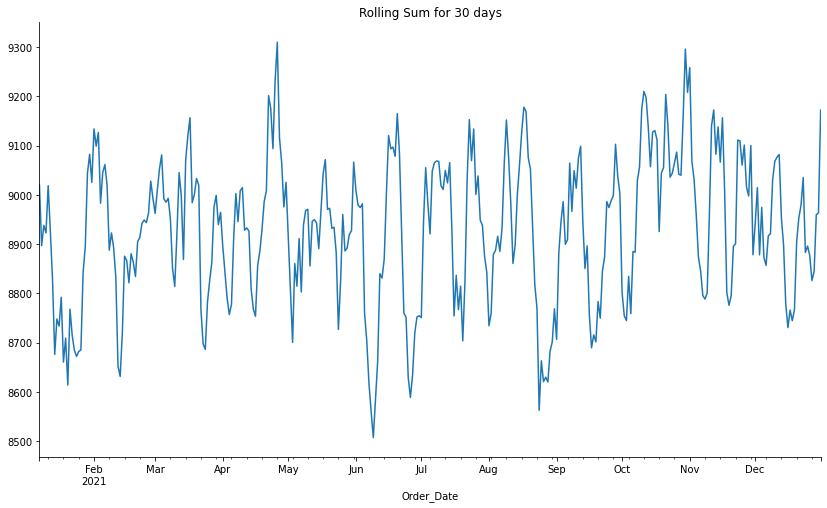

In [1021]:
time_series = (df1['Profit'].reset_index().groupby("Order_Date")["Profit"].sum()).rolling(7).sum().dropna()
plt.subplots(figsize=(14,8))
time_series.plot()
sns.despine()
plt.title("Rolling Sum for 30 days")
plt.show()

# Forecat next 4 weeks sells

In [201]:
import statsmodels
import pmdarima
import skforecast
import sklearn
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [167]:
if adfuller(time_series)[1] <= 0.05:
    print(f"stationray:{adfuller(time_series)[1]}")
else :
    print("non stationray")

stationray:0.0016370041125539278


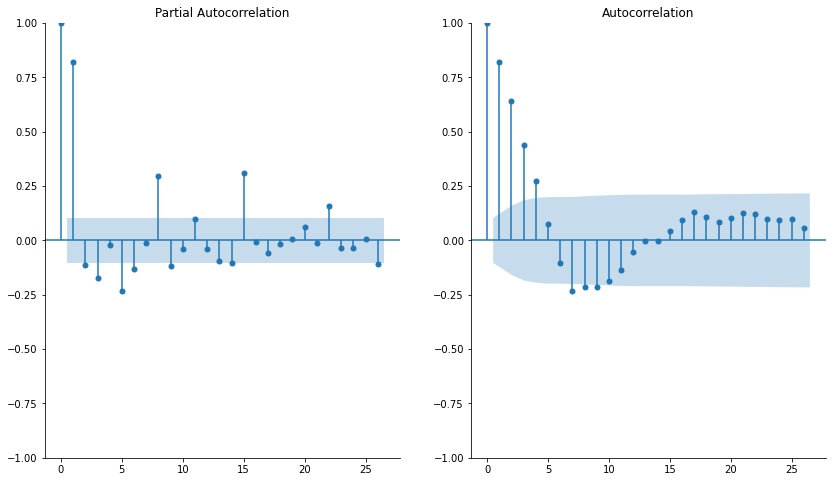

In [179]:
ax,(ax ,ax1) = plt.subplots(nrows=1,ncols=2,figsize=(14,8))
plot_pacf(time_series,ax=ax)
plot_acf(time_series,ax=ax1)
sns.despine()

- AR (1) MA(3)

In [195]:
# split train test cv
_ ,X_test = train_test_split(time_series ,train_size=0.8 ,test_size=0.2 ,shuffle=False)
X_train ,X_cv = train_test_split(X_train ,train_size=0.8 ,test_size=0.2 ,shuffle=False)

In [196]:
# fit the mode
model = ARIMA(endog=X_train ,order=(1,0,3)).fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [198]:
model.predict()

2021-01-07    8916.902515
2021-01-08    9001.398399
2021-01-09    8873.371273
2021-01-10    8936.168738
2021-01-11    8936.010452
                 ...     
2021-08-19    9109.702300
2021-08-20    9016.160758
2021-08-21    9017.057124
2021-08-22    8916.278027
2021-08-23    8803.258319
Freq: D, Name: predicted_mean, Length: 229, dtype: float64

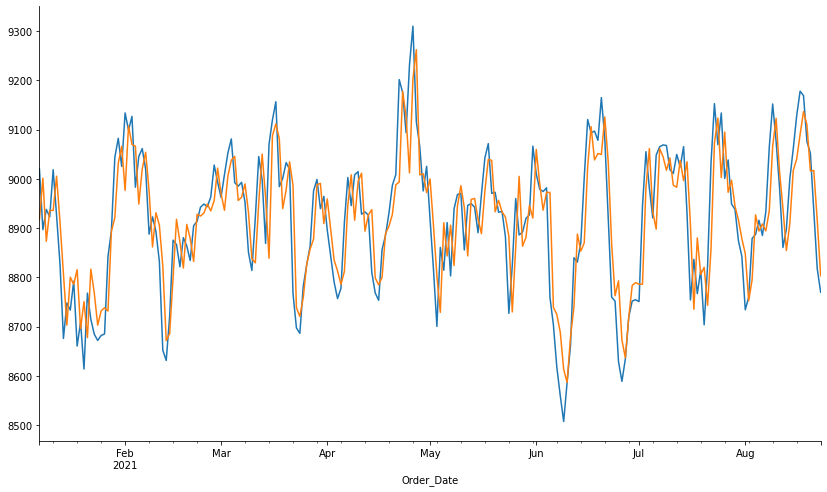

In [200]:
plt.subplots(figsize=(14,8))
X_train.plot(label='train')
model.predict().plot(label='forecast')
sns.despine()
plt.show()

## Evaluation

In [205]:
# train score
train_score = r2_score(X_train ,model.predict())
train_score

0.6934720567908133

In [231]:
X_train1 = X_train.copy()
X_train2 = X_train.copy()

In [234]:
# cv score Walk Forward Method
predictions = []
for _ in range(len(X_cv)):
    X_train1 = X_train1.append(X_cv.iloc[_:_+1])
    model1 = ARIMA(endog=X_train1 ,order=(1,0,3)).fit()
    predictions.append(model1.forecast().values[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_28676\1584738637.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train1 = X_train1.append(X_cv.iloc[_:_+1])
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_28676\1584738637.p

In [236]:
# test score Walk Forward Method
predictions1 = []
for _ in range(len(X_test)):
    X_train2 = X_train2.append(X_test.iloc[_:_+1])
    model2 = ARIMA(endog=X_train2 ,order=(1,0,3)).fit()
    predictions1.append(model2.forecast().values[0])

C:\Users\HP\AppData\Local\Temp\ipykernel_28676\2369518789.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train2 = X_train2.append(X_test.iloc[_:_+1])
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency inf

In [241]:
train_score,r2_score(X_cv ,predictions),r2_score(X_test ,predictions1)

(0.6934720567908133, 0.9545880225656548, 0.9354978361357194)

- wow the model do better on unseen data !!

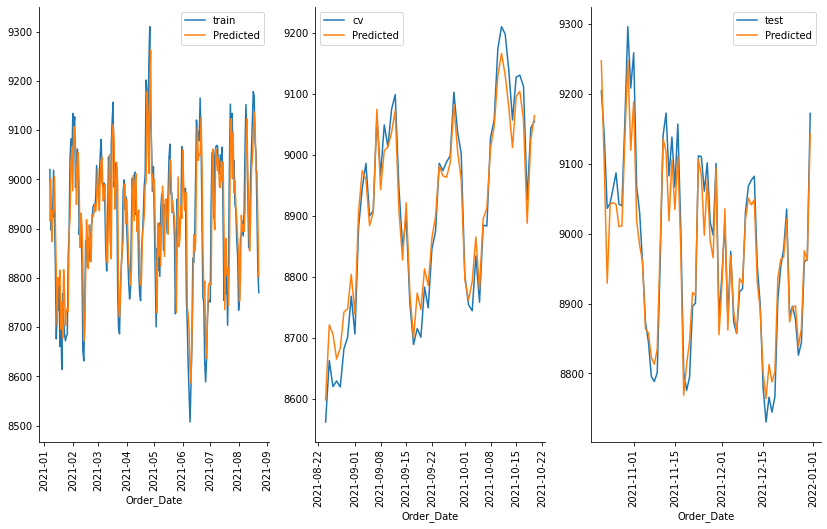

In [273]:
fig, (ax, ax1 ,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting on the first subplot
sns.lineplot(x=X_test.index, y=X_test.values, ax=ax2, label='test')
sns.lineplot(x=X_test.index, y=predictions1, ax=ax2, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_cv.index, y=X_cv.values, ax=ax1, label='cv')
sns.lineplot(x=X_cv.index, y=predictions, ax=ax1, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_train.index, y=X_train.values, ax=ax, label='train')
sns.lineplot(x=X_train.index, y=model.predict().values, ax=ax, label='Predicted')

# Adding legends
ax1.legend()
ax2.legend()
ax.legend()
sns.despine()
ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
# Display the plots
plt.show()

In [275]:
model_auto = auto_arima(y = X_train ,start_p=1 ,start_q= 1 ,max_p= 3 ,max_q=3 ,seasonal=False)

In [276]:
model_auto

ARIMA(order=(3, 0, 3), scoring_args={}, suppress_warnings=True)

In [277]:
# new model
# fit the mode
X_train3 = X_train.copy()
X_train4 = X_train.copy()
new_model = ARIMA(endog=X_train ,order=(3,0,3)).fit()
# cv score Walk Forward Method
predictions2 = []
for _ in range(len(X_cv)):
    X_train3 = X_train3.append(X_cv.iloc[_:_+1])
    new_model1 = ARIMA(endog=X_train3 ,order=(3,0,3)).fit()
    predictions2.append(new_model1.forecast().values[0])
# test score Walk Forward Method
predictions3 = []
for _ in range(len(X_test)):
    X_train4 = X_train4.append(X_test.iloc[_:_+1])
    new_model2 = ARIMA(endog=X_train4 ,order=(3,0,3)).fit()
    predictions3.append(new_model2.forecast().values[0])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Temp\ipykernel_28676\2310005777.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_train3 = X_train3.append(X_cv.iloc[_:_+1])
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\sit

In [280]:
r2_score(X_train ,new_model.predict()),r2_score(X_cv ,predictions2),r2_score(X_test ,predictions3)

(0.7269122360911036, 0.9281620747827962, 0.8990507047950134)

In [281]:
train_score,r2_score(X_cv ,predictions),r2_score(X_test ,predictions1)

(0.6934720567908133, 0.9545880225656548, 0.9354978361357194)

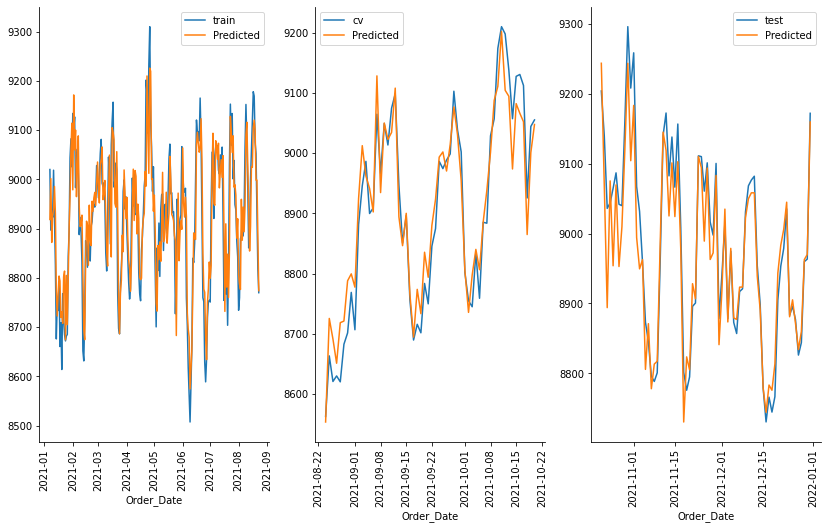

In [282]:
fig, (ax, ax1 ,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting on the first subplot
sns.lineplot(x=X_test.index, y=X_test.values, ax=ax2, label='test')
sns.lineplot(x=X_test.index, y=predictions3, ax=ax2, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_cv.index, y=X_cv.values, ax=ax1, label='cv')
sns.lineplot(x=X_cv.index, y=predictions2, ax=ax1, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_train.index, y=X_train.values, ax=ax, label='train')
sns.lineplot(x=X_train.index, y=new_model.predict().values, ax=ax, label='Predicted')

# Adding legends
ax1.legend()
ax2.legend()
ax.legend()
sns.despine()
ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
# Display the plots
plt.show()


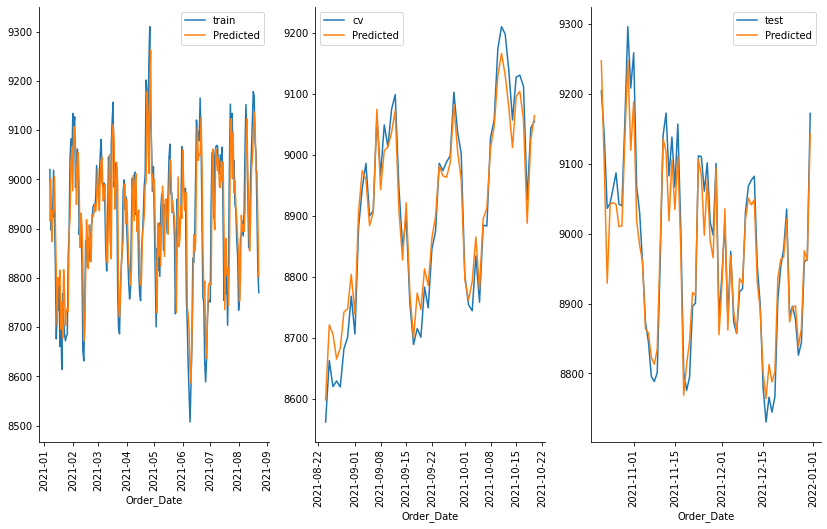

In [283]:
fig, (ax, ax1 ,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(14, 8))

# Plotting on the first subplot
sns.lineplot(x=X_test.index, y=X_test.values, ax=ax2, label='test')
sns.lineplot(x=X_test.index, y=predictions1, ax=ax2, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_cv.index, y=X_cv.values, ax=ax1, label='cv')
sns.lineplot(x=X_cv.index, y=predictions, ax=ax1, label='Predicted')

# Plotting on the second subplot
sns.lineplot(x=X_train.index, y=X_train.values, ax=ax, label='train')
sns.lineplot(x=X_train.index, y=model.predict().values, ax=ax, label='Predicted')

# Adding legends
ax1.legend()
ax2.legend()
ax.legend()
sns.despine()
ax.tick_params(axis='x', rotation=90)
ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
# Display the plots
plt.show()


# Assumptions

In [328]:
import RootsTimeSeries
from RootsTimeSeries import CharacteristicPlotter
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.diagnostic import het_white ,het_arch
from statsmodels.graphics.gofplots import qqplot

In [296]:
model.params[1]

0.7197256353697605

In [298]:
params = [model.params[1],[_ for _ in model.params[2:-1].values]]

In [301]:
checks = CharacteristicPlotter(coef=params ,ar_ma='ar_ma')

stationary : True 
invertible : True 


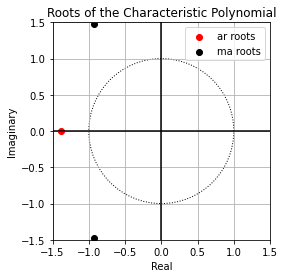

In [302]:
checks.plot_roots()

In [305]:
new_model.params[1:4]

ar.L1    0.789455
ar.L2    0.831708
ar.L3   -0.675707
dtype: float64

In [306]:
new_model.params[4:-1]

ma.L1    0.254792
ma.L2   -0.830778
ma.L3   -0.423016
dtype: float64

In [307]:
params1 = [[_ for _ in new_model.params[1:4].values],[_ for _ in new_model.params[4:-1].values]]

In [309]:
checks1 = CharacteristicPlotter(coef=params1 ,ar_ma='ar_ma')

stationary : True 
invertible : True 


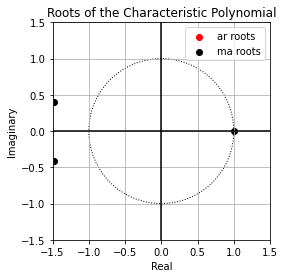

In [311]:
checks1.plot_roots()

In [314]:
shapiro(model.resid)[1],shapiro(new_model.resid)[1]

(0.8395805954933167, 0.136124387383461)

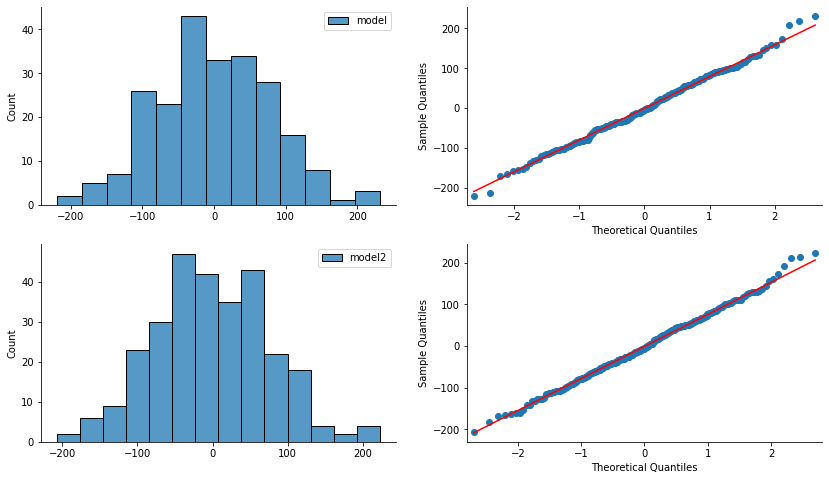

In [331]:
fig,(ax,ax1)=plt.subplots(nrows=2,ncols=2,figsize=(14,8))
sns.histplot(model.resid,ax=ax[0] ,label='model')
sns.histplot(new_model1.resid,ax=ax1[0],label='model2')
qqplot(model.resid,ax=ax[1] ,label='model',line='s')
qqplot(new_model1.resid,ax=ax1[1],label='model2',line='s')
sns.despine()
ax[0].legend()
ax1[0].legend()
plt.show()

In [336]:
if durbin_watson(model.resid) <= 2.1 and durbin_watson(model.resid) >= 1.9 :
    print('no first order autocorrelation')
else:
    print('first order autocorrelation')

no first order autocorrelation


In [337]:
if durbin_watson(new_model.resid) <= 2.1 and durbin_watson(new_model.resid) >= 1.9 :
    print('no first order autocorrelation')
else:
    print('first order autocorrelation')

no first order autocorrelation


In [355]:
acorr_ljungbox(new_model.resid,lags=5)['lb_pvalue'].values

array([0.47361837, 0.70989667, 0.52264619, 0.2907327 , 0.1971545 ])

In [350]:
acorr_ljungbox(model.resid,lags=5)['lb_pvalue'].values

array([0.78409955, 0.89907587, 0.94441463, 0.06080686, 0.08467195])

- no high order autocorrelation till 5 lags

model 2 learn more than model 1
i will choose model 2 for next comparison

In [358]:
# forecast 4 points
new_model_final = ARIMA(endog=time_series ,order=(3,0,3)).fit()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [363]:
time_series.append(new_model_final.forecast(steps=4))

C:\Users\HP\AppData\Local\Temp\ipykernel_28676\3717964486.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  time_series.append(new_model_final.forecast(steps=4))


2021-01-07    9020.074679
2021-01-08    8897.044016
2021-01-09    8938.151273
2021-01-10    8922.953846
2021-01-11    9018.675973
                 ...     
2021-12-31    9172.100557
2022-01-01    9179.766688
2022-01-02    9173.585410
2022-01-03    9159.174008
2022-01-04    9107.591511
Length: 363, dtype: float64

In [ ]:
fig.add

C:\Users\HP\AppData\Local\Temp\ipykernel_28676\2618409424.py:3: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



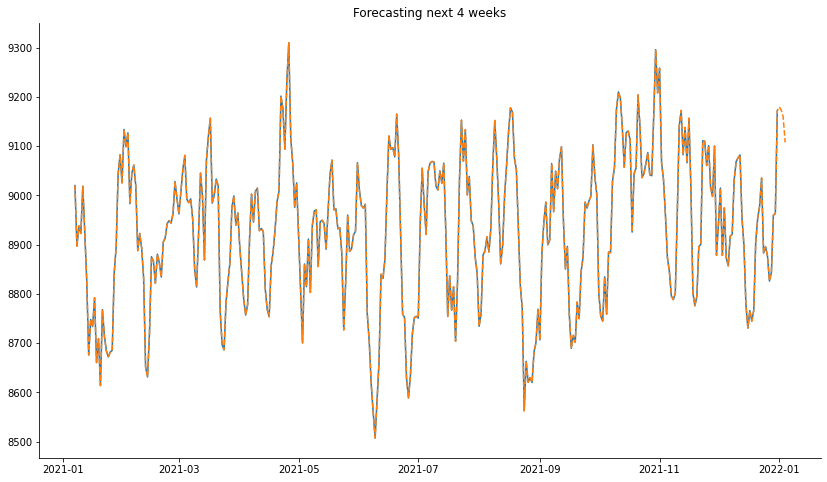

In [389]:
plt.subplots(figsize=(14,8))
plt.plot(time_series)
plt.plot(time_series.append(new_model_final.forecast(steps=4)),'--')
sns.despine()
plt.title("Forecasting next 4 weeks")
plt.show()

- we use recursive method to forecast 4 weeks and this method is not good ,lets forecast using direct method and multiple output

# Direct Method

In [431]:
for _ in range(1,150,1):
    mod = ForecasterAutoregDirect(regressor=LinearRegression() ,steps = 4 ,lags=_)
    mod.fit(X_train)
    print(r2_score(X_cv.iloc[:4].values,mod.predict().values),_)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index

-36.50729585852728 1
-34.25083579557132 2
-26.248009257459216 3
-19.360343908678164 4
-17.367344192610652 5
-16.893233447918877 6
-17.234641512154568 7
-16.410015672247624 8
-16.79953434020887 9
-17.029606889112557 10
-17.82110998430545 11
-18.29037855695827 12


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-18.21863514073904 13
-21.04390603651069 14
-25.105331682923858 15
-25.84824962000419 16
-25.48123592034963 17
-24.651119290820287 18
-26.104616320636726 19
-28.252611889765845 20
-29.522222422546545 21
-28.398793759736268 22


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-34.249942486303475 23
-29.564408735699516 24
-30.1151519456611 25
-27.399581370557954 26
-28.1679547636479 27
-34.08864240883587 28
-28.142698563150766 29


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-28.834141963739597 30
-28.04133882030318 31
-28.65534534923705 32
-28.4176334940479 33
-23.25251589012072 34
-21.559488669779036 35


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-22.426731621596385 36
-24.619369429460303 37
-21.33723480204166 38
-22.36251976965173 39
-17.209389283481315 40
-15.718605231297175 41
-17.43977932967956 42
-19.408983286300497 43
-19.680501596449766 44


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-19.975147911442008 45
-19.36553825278059 46
-19.213730298557714 47
-19.97761272216064 48
-21.04937345945681 49
-20.771271946241658 50


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-20.80332013879455 51
-21.850933613068147 52
-24.786150752954907 53
-23.804068575035046 54
-24.510634858470166 55
-25.085328513715375 56
-26.364293769038206 57


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-28.176648365037817 58
-27.32019109809944 59
-26.703222320825 60
-27.240847276177725 61
-30.85518809724333 62
-32.27746629973247 63
-27.03033494330022 64


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-26.329524648194806 65
-30.56282304318384 66
-25.110527176101197 67
-22.3276861898344 68
-23.41193185846841 69
-20.527515957312314 70


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-16.281610142977307 71
-14.028893047497496 72
-15.263300013097094 73
-16.27523384433595 74
-16.92819032011384 75
-15.78859737428488 76
-14.172560516777743 77


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-13.916818235188384 78
-12.5515204755676 79
-12.285295081943103 80
-10.98527670036518 81
-14.364347923245829 82
-10.441191119457805 83
-10.938429487214982 84


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-10.318261656201717 85
-10.300493785016936 86
-11.97776193485047 87
-13.135548964003613 88
-19.499338217399636 89
-16.87704115662459 90
-12.227478386232622 91


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-6.3649666411474 92
-1.5321851699106985 93
0.25928653763321285 94
0.5411507561852574 95
0.13406561606185163 96


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

0.5656615420525428 97
-3.158770302759266 98
-3.3240067565582736 99
-1.3640520247811119 100
-0.6266435636097911 101
-0.5733424877150439 102


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-0.6174625196434083 103
-0.7317211475707448 104
-1.5684204079595294 105
-3.5807047160949725 106
-3.802405208444698 107
-3.7716976348597067 108


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-10.409112784629631 109
-8.058050277176857 110
-44.748256698291 111
-222.70059915352604 112
-747.9650344217529 113
-257.692309739797 114


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-59.962197444770325 115
-30.423267810627134 116
-8.132693685952114 117
-21.209297225306187 118
-5.250115712936624 119
-7.557565042045818 120


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-13.329977867924832 121
-19.057994041912497 122
-21.010940262748175 123
-20.39844502109318 124
-14.892635873548802 125
-15.018772989285505 126


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-6.7884069102314815 127
-4.268120949832869 128
-2.962167559814756 129
-1.974045494005083 130
-1.7430983384660204 131
-0.6381392019637626 132


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

0.017254979794193992 133
-3.7667319320042285 134
-2.654767822054343 135
-6.811459679653605 136
-7.703486638082023 137


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

-5.5840144811663635 138
-6.666321801758393 139
-4.809617719017545 140
-5.170340518881687 141
-6.2890496454488956 142
-3.7444910757254117 143
-7.371429492361212 144
-9.054728653380826 145
-8.564086611794611 146
-10.359672520490118 147
-7.880231439946417 148
-7.4441989937823685 149


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeI

In [439]:
mod = ForecasterAutoregDirect(regressor=LinearRegression() ,steps = 4 ,lags=97)
mod.fit(time_series.iloc[:-4])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



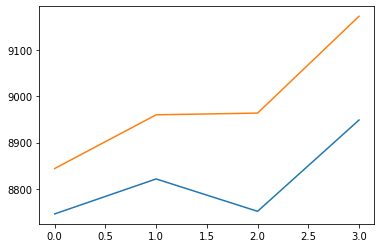

In [443]:
plt.plot(mod.predict(steps=4).values)
plt.plot(time_series.iloc[-4:].values)

In [446]:
r2_score(time_series.iloc[-4:].values,mod.predict(steps=4).values)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



-1.20431767441641

In [447]:
mod = ForecasterAutoregDirect(regressor=LinearRegression() ,steps = 4 ,lags=97)
mod.fit(time_series)

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:805: UserWarning:

`y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\skforecast\utils\utils.py:867: UserWarning:

`last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.



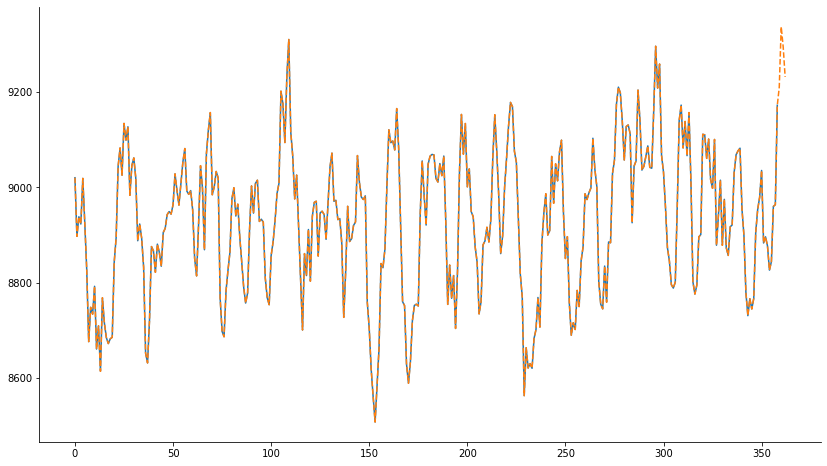

In [457]:
plt.subplots(figsize=(14,8))
plt.plot(time_series.values)
plt.plot(np.append(time_series.values,mod.predict().values),'--')
sns.despine()
plt.show()

# Multiple Outputs

In [675]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense ,Bidirectional ,LSTM ,Lambda ,Input ,BatchNormalization
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.optimizers import Adam

In [462]:
time_series=time_series.values

In [845]:
x=[]
y=[]
for _ in range(len(time_series)-8):
        print(time_series[_:_+4],0,time_series[_+4:_+8])
        x.append(time_series[_:_+4]),y.append(time_series[_+4:_+8])
    

[9020.07467852 8897.04401625 8938.15127292 8922.95384649] 0 [9018.67597278 8925.58949751 8826.91349992 8676.00686915]
[8897.04401625 8938.15127292 8922.95384649 9018.67597278] 0 [8925.58949751 8826.91349992 8676.00686915 8748.02070562]
[8938.15127292 8922.95384649 9018.67597278 8925.58949751] 0 [8826.91349992 8676.00686915 8748.02070562 8733.68542043]
[8922.95384649 9018.67597278 8925.58949751 8826.91349992] 0 [8676.00686915 8748.02070562 8733.68542043 8792.18113555]
[9018.67597278 8925.58949751 8826.91349992 8676.00686915] 0 [8748.02070562 8733.68542043 8792.18113555 8660.50482826]
[8925.58949751 8826.91349992 8676.00686915 8748.02070562] 0 [8733.68542043 8792.18113555 8660.50482826 8709.14123791]
[8826.91349992 8676.00686915 8748.02070562 8733.68542043] 0 [8792.18113555 8660.50482826 8709.14123791 8613.89160592]
[8676.00686915 8748.02070562 8733.68542043 8792.18113555] 0 [8660.50482826 8709.14123791 8613.89160592 8768.05802524]
[8748.02070562 8733.68542043 8792.18113555 8660.50482826

In [846]:
x = np.array(x)

In [847]:
y = np.array(y)

In [848]:
x = np.expand_dims(x,-1)

In [851]:
y.shape

(351, 4)

In [629]:
point = time_series[-4:]

In [852]:
_ ,X_test ,_1  ,y_test = train_test_split(x ,y ,shuffle=False)
X_train ,X_cv ,y_train  ,y_cv = train_test_split(_ ,_1 ,shuffle=False)

In [853]:
X_train.shape ,X_cv.shape ,y_train.shape ,y_cv.shape

((197, 4, 1), (66, 4, 1), (197, 4), (66, 4))

- becasue LSTM Models have Extrapolated problem i normalize the data 

In [856]:
m = np.max(X_train)

In [857]:
X_train1 = (X_train)/m
y_train1 = (y_train)/m
X_cv1 = (X_cv)/m
y_cv1 = (y_cv)/m
X_test1 = (X_test)/m
y_test1 = (y_test)/m

In [932]:
lstm_model = Sequential([
    Input(X_train.shape[1:]),
    Bidirectional(LSTM(units=3*64)),
    Dense(units=3*32, activation='swish'),
    Dense(units=3*16, activation='relu'),
    Dense(units=4*8, activation='relu'),
    Dense(units=4, activation='linear')
])


In [933]:
lstm_model.compile(loss='mse' ,optimizer=Adam(learning_rate=0.0001) ,metrics='mse')

In [951]:
history = lstm_model.fit(x = X_train1 ,y=y_train1 ,validation_data=(X_cv1 ,y_cv1) ,epochs=100)

Epoch 1/100
7/7 [==============================] - 1s 111ms/step - loss: 1.4859e-04 - mse: 1.4859e-04 - val_loss: 1.4499e-04 - val_mse: 1.4499e-04
Epoch 2/100
7/7 [==============================] - 0s 25ms/step - loss: 1.4653e-04 - mse: 1.4653e-04 - val_loss: 2.1016e-04 - val_mse: 2.1016e-04
Epoch 3/100
7/7 [==============================] - 0s 21ms/step - loss: 1.8381e-04 - mse: 1.8381e-04 - val_loss: 1.4509e-04 - val_mse: 1.4509e-04
Epoch 4/100
7/7 [==============================] - 0s 29ms/step - loss: 1.4997e-04 - mse: 1.4997e-04 - val_loss: 1.4147e-04 - val_mse: 1.4147e-04
Epoch 5/100
7/7 [==============================] - 0s 25ms/step - loss: 1.4593e-04 - mse: 1.4593e-04 - val_loss: 1.4319e-04 - val_mse: 1.4319e-04
Epoch 6/100
7/7 [==============================] - 0s 21ms/step - loss: 1.4714e-04 - mse: 1.4714e-04 - val_loss: 1.4451e-04 - val_mse: 1.4451e-04
Epoch 7/100
7/7 [==============================] - 0s 17ms/step - loss: 1.4398e-04 - mse: 1.4398e-04 - val_loss: 1.6830e-04

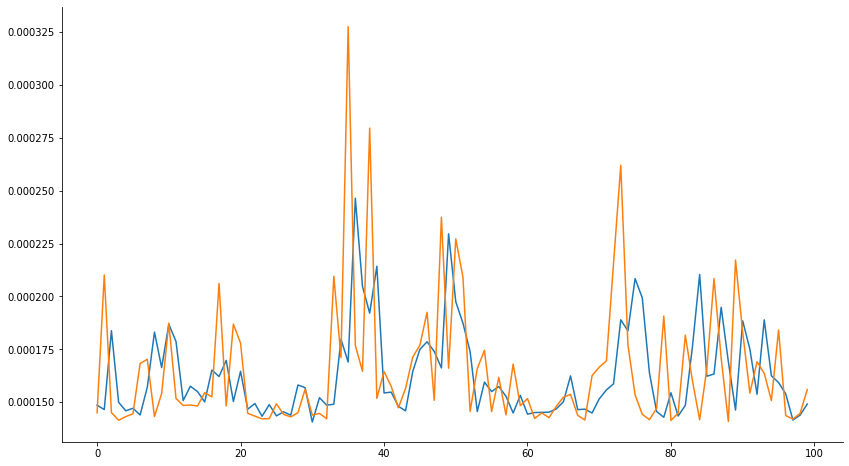

In [952]:
plt.subplots(figsize=(14,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
sns.despine()
plt.show()

In [953]:
trainin_predi = (lstm_model.predict(X_train1))
cv_predi = (lstm_model.predict(X_cv1))
test_predi = (lstm_model.predict(X_test1))

3/3 [==============================] - 0s 4ms/step


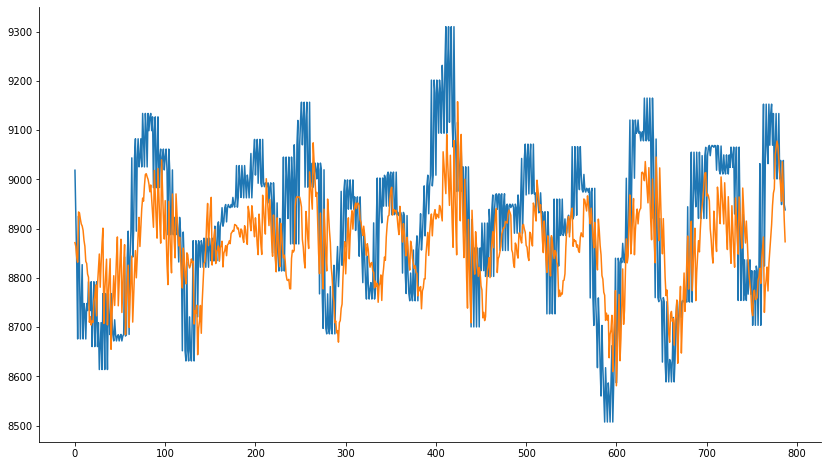

In [954]:
plt.subplots(figsize=(14,8))
plt.plot(y_train1.flatten()*m)
plt.plot(trainin_predi.flatten()*m)
sns.despine()
plt.show()

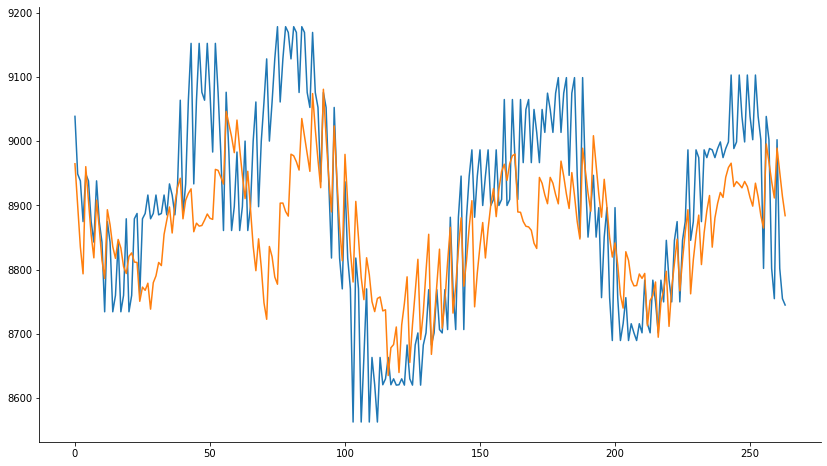

In [955]:
plt.subplots(figsize=(14,8))
plt.plot(y_cv1.flatten()*m)
plt.plot(cv_predi.flatten()*m)
sns.despine()
plt.show()

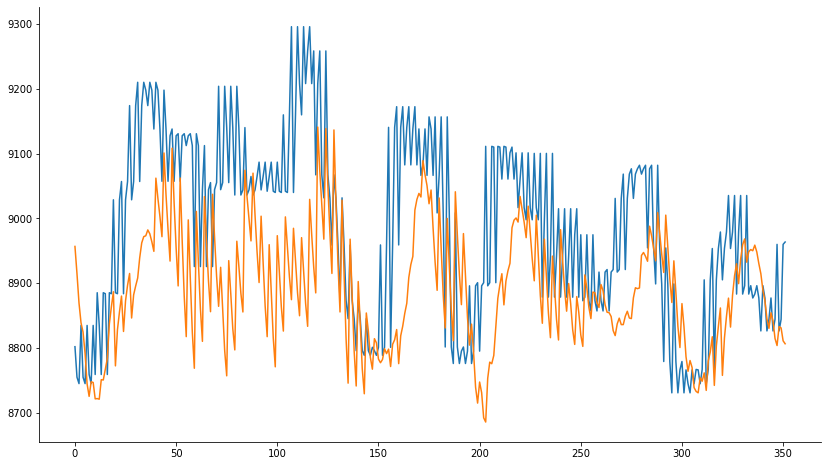

In [956]:
plt.subplots(figsize=(14,8))
plt.plot(y_test1.flatten()*m)
plt.plot(test_predi.flatten()*m)
sns.despine()
plt.show()

In [957]:
forecast_point = time_series[-4:]

In [958]:
(lstm_model.predict(forecast_point.reshape(1,4,1))*m).flatten()

1/1 [==============================] - 0s 73ms/step


array([29966.295, 20506.264, 21604.793, 13617.831], dtype=float32)

1/1 [==============================] - 0s 51ms/step


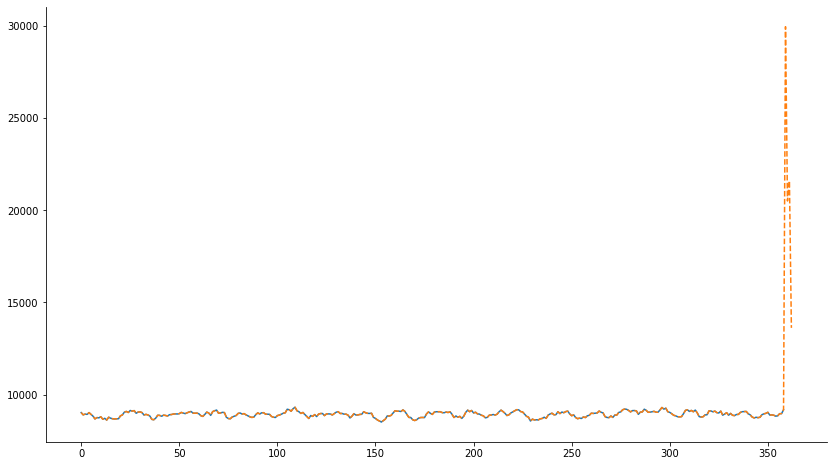

In [959]:
plt.subplots(figsize=(14,8))
plt.plot(time_series)
plt.plot(np.append(time_series,(lstm_model.predict(forecast_point.reshape(1,4,1))*m).flatten()),'--')
sns.despine()
plt.show()

In [964]:
r2_score(X_train1.flatten()*m ,trainin_predi.flatten()*m),r2_score(X_cv1.flatten()*m ,cv_predi.flatten()*m),r2_score(X_test1.flatten()*m ,test_predi.flatten()*m)

(0.10822876226532652, 0.15021973343835227, -0.46473676812167763)

- Direct Method is the best method fit the data and do better